In [264]:
import pandas as pd
import numpy as np

df = pd.read_csv('/Users/balmukundmishra/Desktop/2025-Learning/ML-Course/9_Problem_Statements/data/common.csv')



In [265]:
df['hour'] = pd.to_datetime(df['time']).dt.hour
df['minute'] = pd.to_datetime(df['time']).dt.minute
df['seconds'] = pd.to_datetime(df['time']).dt.second

df = df.drop(columns=['time'])

In [266]:
df.head()


,Unnamed: 0,day,duration,flow_rate,variability,isleak,hour,minute,seconds
0,0,Sun,10,2.005437,0.445410,False,0,31,37
1,1,Sat,141,2.244325,0.097051,False,19,20,8
2,2,Thu,22,1.447766,0.328988,False,19,24,42
3,3,Sat,45,1.796816,0.670781,False,15,20,20
4,4,Mon,37,0.372023,0.347357,False,21,47,19


In [267]:
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

# Select top k features based on F-test
X_num = df.drop(columns=['isleak', 'day'])  # Drop non-numeric
y = df['isleak'].astype(int)

selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X_num, y)

# Show feature importance scores
import pandas as pd
scores = pd.DataFrame({
    'Feature': X_num.columns,
    'F_Score': selector.scores_,
    'P_Value': selector.pvalues_
}).sort_values(by='F_Score', ascending=False)

print(scores)


       Feature     F_Score       P_Value
1     duration  147.454128  1.077572e-33
3  variability   38.773499  4.950774e-10
4         hour    0.056795  8.116398e-01
6      seconds    0.024662  8.752154e-01
0   Unnamed: 0    0.015453  9.010715e-01
2    flow_rate    0.003883  9.503155e-01
5       minute    0.000807  9.773371e-01


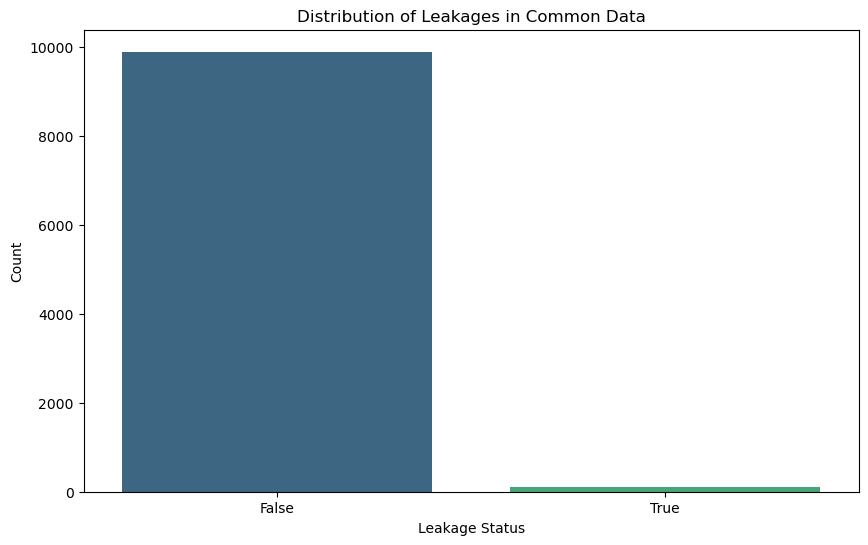

In [270]:
## lets plot the data
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='isleak', data=df, palette='viridis')
plt.title('Distribution of Leakages in Common Data')
plt.xlabel('Leakage Status')
plt.ylabel('Count')
plt.show()


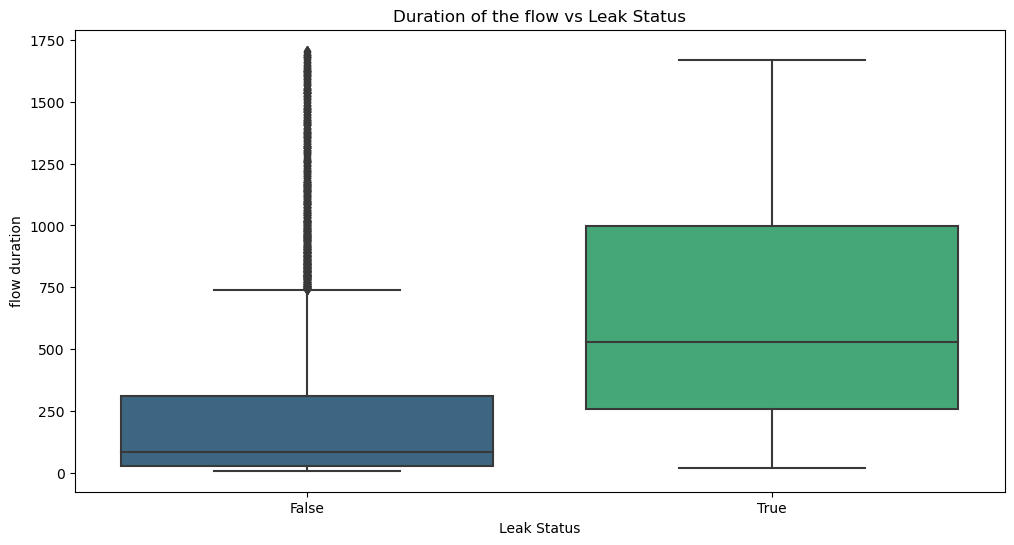

In [271]:
## lets plot the relevence of variability collumn on leak status
plt.figure(figsize=(12, 6))
sns.boxplot(x='isleak',y='duration', data=df, palette='viridis')
plt.title('Duration of the flow vs Leak Status')
plt.xlabel('Leak Status')
plt.ylabel('flow duration')
plt.show()

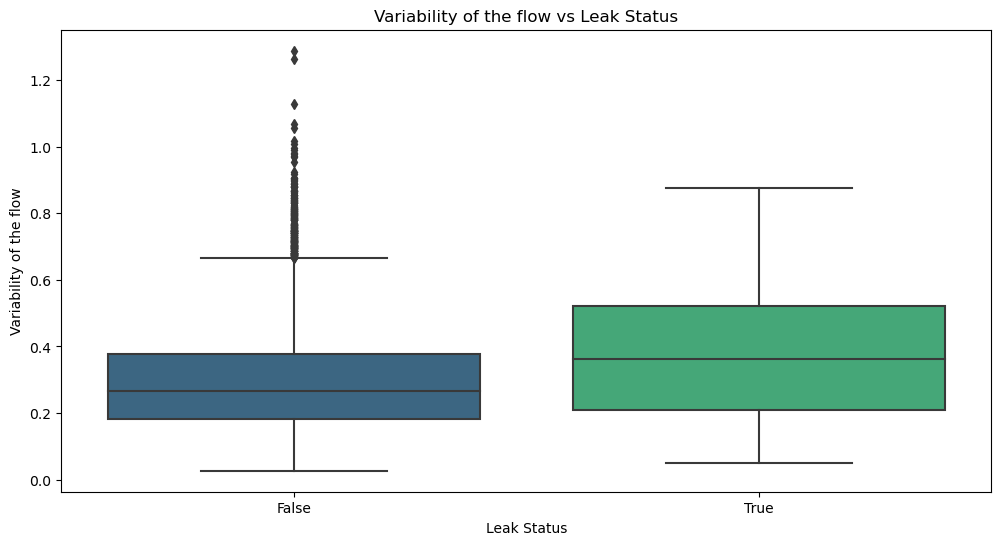

In [272]:
## lets plot the relevence of variability collumn on leak status
plt.figure(figsize=(12, 6))
sns.boxplot(x='isleak',y='variability', data=df, palette='viridis')
plt.title('Variability of the flow vs Leak Status')
plt.xlabel('Leak Status')
plt.ylabel('Variability of the flow')
plt.show()

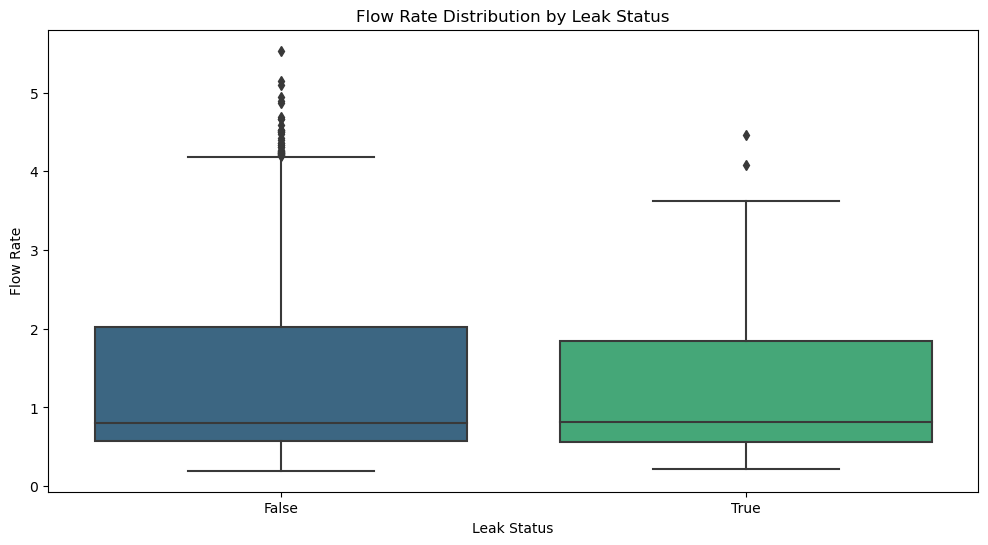

In [273]:
## lets check the relevence of flow_rate on leak status
plt.figure(figsize=(12, 6))
sns.boxplot(x='isleak', y='flow_rate', data=df, palette='viridis')
plt.title('Flow Rate Distribution by Leak Status')
plt.xlabel('Leak Status')
plt.ylabel('Flow Rate')
plt.show()

In [280]:
df.columns

Index(['day', 'duration', 'flow_rate', 'variability', 'isleak', 'hour',
       'minute', 'seconds'],
      dtype='object')

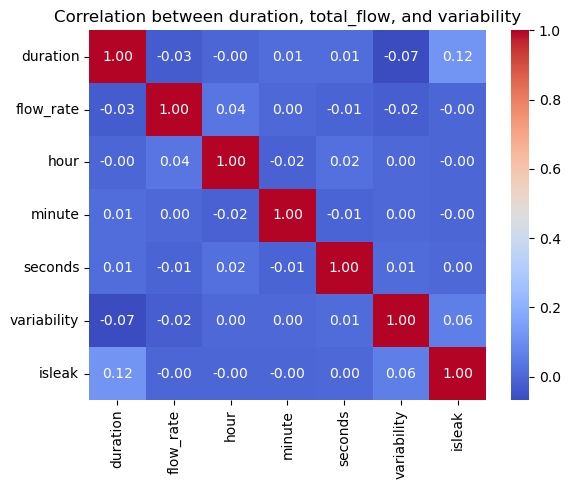

In [284]:
import seaborn as sns
import matplotlib.pyplot as plt

# lets select all the features in df
features = df[['duration', 'flow_rate', 'hour','minute', 'seconds', 'variability', 'isleak']]

# Compute correlation matrix
corr_matrix = features.corr()

# Display as heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between duration, total_flow, and variability")
plt.show()


In [288]:
# lets take these featues and apply pca to get only two featurees
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_num_scaled = (X_num - X_num.mean()) / X_num.std()  # Standardize the data
X_pca = pca.fit_transform(X_num_scaled)
# Create a DataFrame with PCA components
pca_df = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
# Combine PCA components with the target variable
pca_df['isleak'] = y.values


<function matplotlib.pyplot.show(close=None, block=None)>

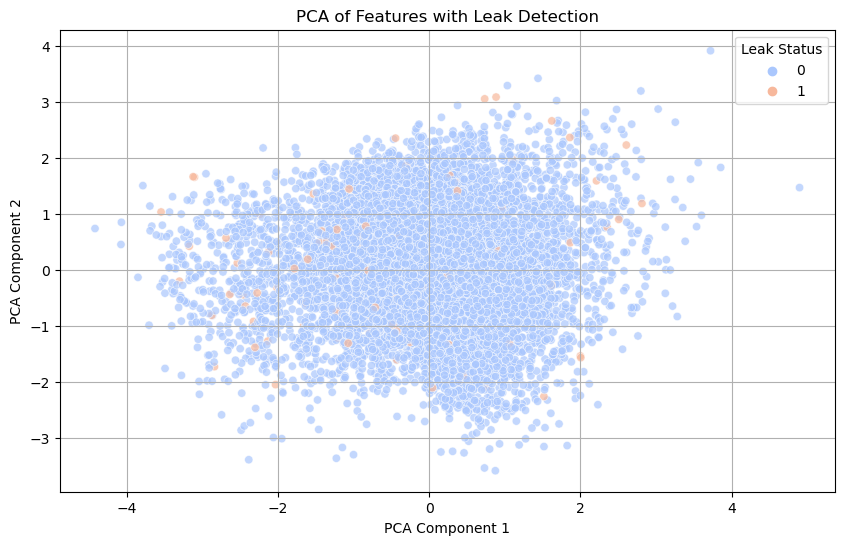

In [286]:
# lets plot this pca_df with components and lables as colour of points
import matplotlib.pyplot as plt 
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='isleak', palette='coolwarm', alpha=0.7)
plt.title('PCA of Features with Leak Detection')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Leak Status')
plt.grid(True)
plt.show


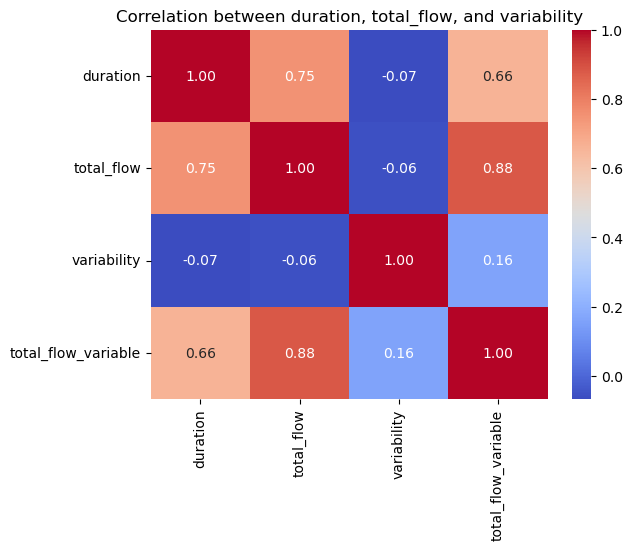

In [210]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the three features
features = df[['duration', 'total_flow', 'variability', 'total_flow_variable']]

# Compute correlation matrix
corr_matrix = features.corr()

# Display as heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation between duration, total_flow, and variability")
plt.show()


In [211]:
df.columns

Index(['Unnamed: 0', 'day', 'duration', 'flow_rate', 'variability', 'isleak',
       'hour', 'minute', 'seconds', 'total_flow', 'total_flow_variable'],
      dtype='object')

In [212]:
df = df.drop(columns=['Unnamed: 0', 'day', 'flow_rate', 'hour', 'minute', 'seconds'])

In [213]:
df.head()

,duration,variability,isleak,total_flow,total_flow_variable
0,10,0.445410,False,20.054368,8.932410
1,141,0.097051,False,316.449891,30.711672
2,22,0.328988,False,31.850842,10.478541
3,45,0.670781,False,80.856712,54.237107
4,37,0.347357,False,13.764847,4.781315


In [214]:
X = df.drop(['isleak'], axis=1)
y = df['isleak']

((8000, 4), (2000, 4))

array([[-0.51731908,  0.32898595, -0.49674805, -0.43859061],
       [-0.49500415, -0.20041395, -0.45098448, -0.41175048],
       [ 0.89131109, -0.64246049,  0.3424449 ,  0.07708146],
       ...,
       [ 3.30132391,  0.63753567,  4.9299771 ,  6.48175586],
       [-0.08217788,  1.63248327,  0.03773084,  0.53568542],
       [-0.65957679, -0.44144629, -0.49531515, -0.45575299]])

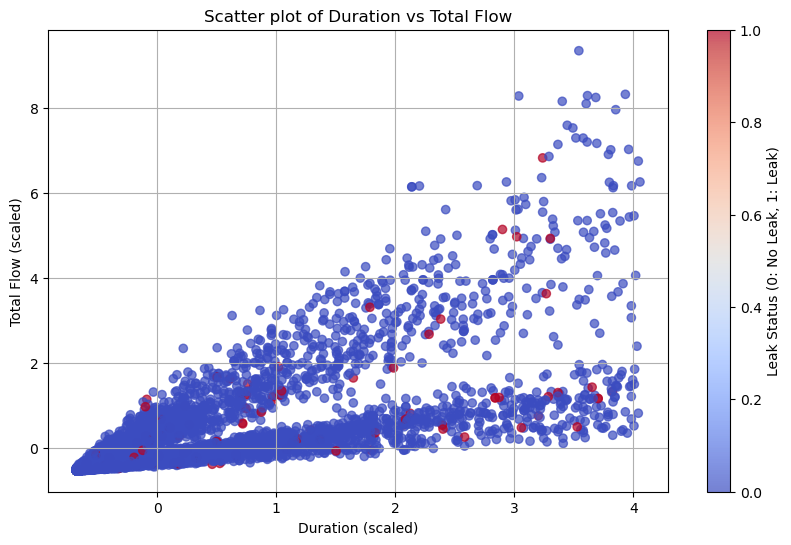

In [225]:
from sklearn.metrics import recall_score, f1_score,roc_auc_score, accuracy_score, confusion_matrix

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_bal, y_train_bal)

    # Make predictions
    y_train_pred = model.predict(X_train_bal)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_train_confusion = confusion_matrix(y_train, y_train_pred)
    model_train_auc_roc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

    # Test set performance 
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred)
    model_test_auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    model_test_confusion = confusion_matrix(y_test, y_test_pred)

    print(list(models.values())[i])
    print("-------------------------------")
    print("Model Performance for train set")
    print("model train accuracy", model_train_accuracy)
    print("Model recall on train set", model_train_recall)
    print("model f1 score on train set", model_train_f1)
    print("model train auc roc", model_train_auc_roc)
    print("model train confusing matrix", model_train_confusion)
    
    print("--------------------------")
    print("Model performance on Test set")
    print("model test set accuracy", model_test_accuracy)
    print("Test set recall", model_test_recall)
    print("Test set f1", model_test_f1)
    print("Test set auc roc", model_test_auc_roc)
    print("Test set confusion matrix", model_test_confusion)

LogisticRegression()
-------------------------------
Model Performance for train set
model train accuracy 0.98875
Model recall on train set 0.01098901098901099
model f1 score on train set 0.02173913043478261
model train auc roc 0.8026132421125467
model train confusing matrix [[7909    0]
 [  90    1]]
--------------------------
Model performance on Test set
model test set accuracy 0.9885
Test set recall 0.0
Test set f1 0.0
Test set auc roc 0.7557124320995798
Test set confusion matrix [[1977    0]
 [  23    0]]
RandomForestClassifier(class_weight='balanced', max_depth=8, max_features=5,
                       min_samples_split=15)
-------------------------------
Model Performance for train set
model train accuracy 0.956375
Model recall on train set 0.967032967032967
model f1 score on train set 0.3352380952380952
model train auc roc 0.9886136117012334
model train confusing matrix [[7563  346]
 [   3   88]]
--------------------------
Model performance on Test set
model test set accuracy 0

In [181]:
df_leak_false = df[df['isleak'] == False]
df_leak_false

,Unnamed: 0,time,day,duration,flow_rate,variability,isleak,total_flow
0,0,0:31:37,Sun,10,2.005437,0.445410,False,20.054368
1,1,19:20:08,Sat,141,2.244325,0.097051,False,316.449891
2,2,19:24:42,Thu,22,1.447766,0.328988,False,31.850842
3,3,15:20:20,Sat,45,1.796816,0.670781,False,80.856712
4,4,21:47:19,Mon,37,0.372023,0.347357,False,13.764847
...,...,...,...,...,...,...,...,...
9995,9995,9:25:54,Wed,57,0.463154,0.462558,False,26.399806
9996,9996,7:22:34,Sun,66,3.085876,0.615994,False,203.667841
9997,9997,14:32:06,Sat,423,2.015229,0.359196,False,852.441796
9998,9998,21:30:04,Fri,77,0.303997,0.384933,False,23.407771


In [178]:
## i want to see the rows where df['is_leak] == True
df_leak = df[df['isleak'] == True]



In [179]:
df_leak

,Unnamed: 0,time,day,duration,flow_rate,variability,isleak,total_flow
102,102,0:16:22,Sat,1298,0.416766,0.218123,True,540.961741
118,118,16:08:36,Fri,992,3.064407,0.356624,True,3039.892076
225,225,9:32:42,Wed,546,2.471785,0.611863,True,1349.594513
625,625,0:18:04,Tue,230,1.810300,0.118123,True,416.369002
640,640,16:27:02,Fri,1000,0.713428,0.750741,True,713.427839
...,...,...,...,...,...,...,...,...
9511,9511,11:55:43,Mon,1580,0.631295,0.384515,True,997.445847
9563,9563,21:04:00,Fri,1014,0.783444,0.367599,True,794.412343
9577,9577,11:50:29,Wed,1349,0.441463,0.405800,True,595.533660
9927,9927,21:34:16,Tue,715,0.788689,0.161238,True,563.912627


In [172]:
df['mean_flow_5'] = df['total_flow'].rolling(window=5).mean()
df['flow_deviation'] = df['total_flow'] - df['mean_flow_5']
df['variability_delta'] = df['variability'].diff()

KeyError: 'total_flow'

In [170]:
df.columns

Index(['Unnamed: 0', 'time', 'day', 'duration', 'flow_rate', 'variability',
       'isleak'],
      dtype='object')

In [171]:
df.isnull().sum()

Unnamed: 0     0
time           0
day            0
duration       0
flow_rate      0
variability    0
isleak         0
dtype: int64

In [85]:
#df1.head()

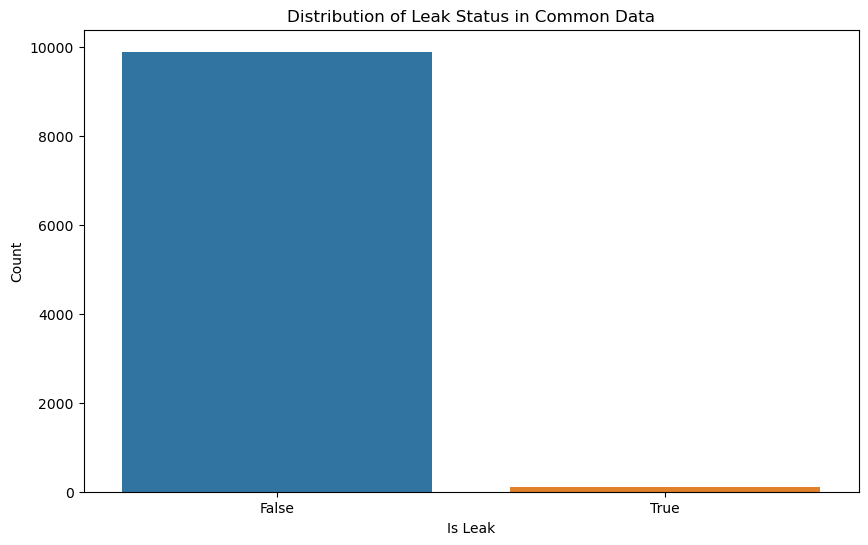

In [86]:
# #### Explore the data and produce a couple plots that visualize it in an informative way.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='isleak', data=df)
plt.title('Distribution of Leak Status in Common Data')
plt.xlabel('Is Leak')
plt.ylabel('Count')
plt.show()

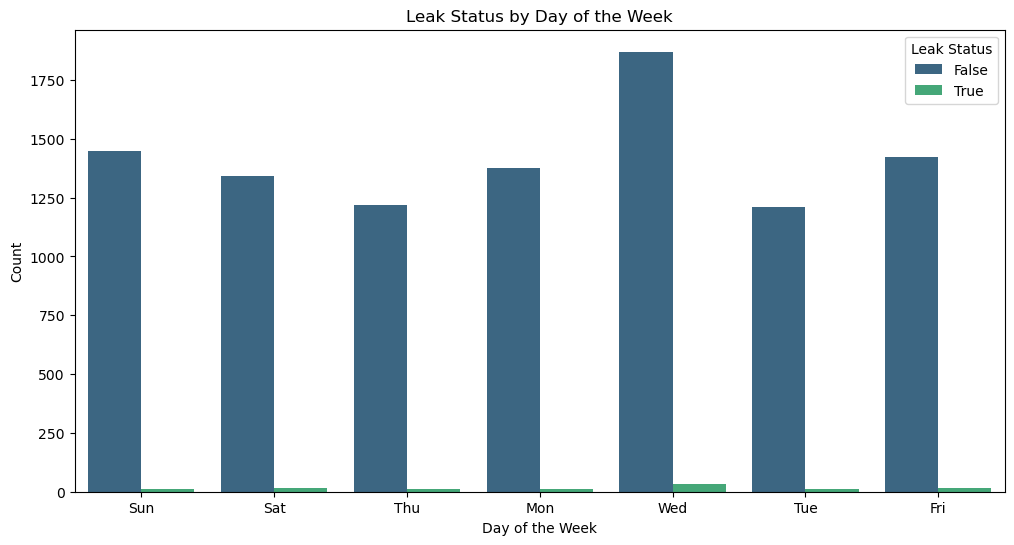

In [87]:
## lets plot the leaks status for each day of the week
plt.figure(figsize=(12, 6))
sns.countplot(x='day', hue='isleak', data=df, palette='viridis')
plt.title('Leak Status by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Leak Status', loc='upper right')
plt.show()


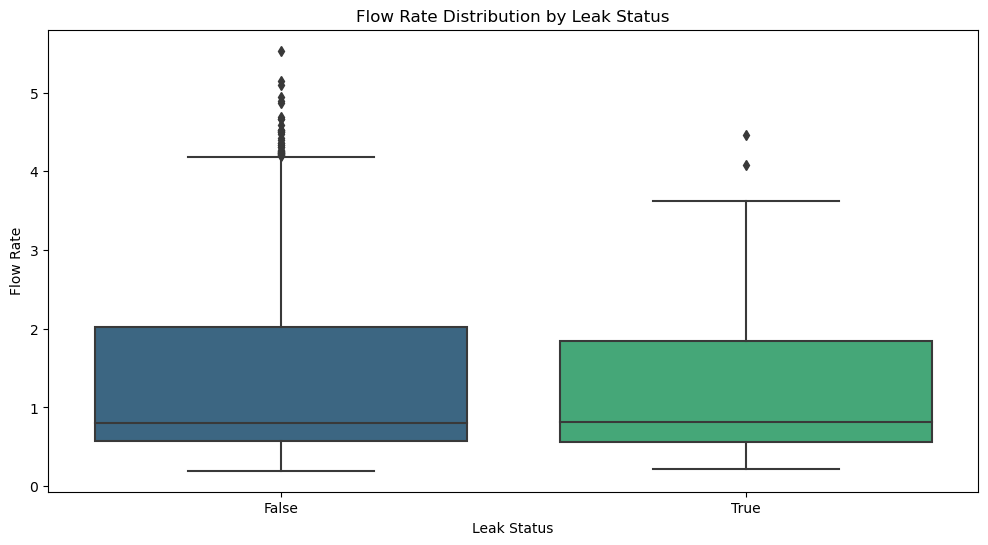

In [88]:
## lets check the relevence of flow_rate on leak status
plt.figure(figsize=(12, 6))
sns.boxplot(x='isleak', y='flow_rate', data=df, palette='viridis')
plt.title('Flow Rate Distribution by Leak Status')
plt.xlabel('Leak Status')
plt.ylabel('Flow Rate')
plt.show()

In [90]:
df['total_flow'] = df['flow_rate'] * df['duration']
#df = df.drop(columns=['flow_rate', 'duration'])

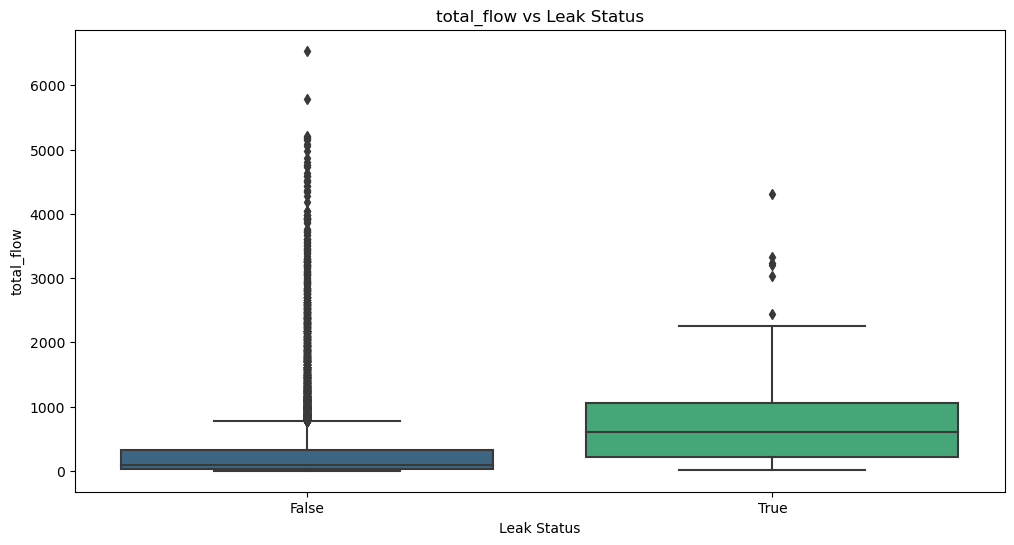

In [91]:
## lets plot the relevence of variability collumn on leak status
plt.figure(figsize=(12, 6))
sns.boxplot(x='isleak',y='total_flow', data=df, palette='viridis')
plt.title('total_flow vs Leak Status')
plt.xlabel('Leak Status')
plt.ylabel('total_flow')
plt.show()

In [92]:
df['hour'] = pd.to_datetime(df['time']).dt.hour
df['minute'] = pd.to_datetime(df['time']).dt.minute
df['seconds'] = pd.to_datetime(df['time']).dt.second

df = df.drop(columns=['time'])

In [93]:
def time_bin(hour):
    if hour < 6:
        return 'night'
    elif hour < 12:
        return 'morning'
    elif hour < 18:
        return 'afternoon'
    else:
        return 'evening'

df['time_bin'] = df['hour'].apply(time_bin)

In [94]:
df = df.drop(columns=['hour', 'minute', 'seconds'])

In [95]:
# Encode weekend
df['is_weekend'] = df['day'].isin(['Sat', 'Sun']).astype(int)

# Optional: label encoding for day (or you can one-hot later)
day_mapping = {'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6}
df['day_encoded'] = df['day'].map(day_mapping)


In [96]:
df = df.drop(columns=['day'])

In [97]:
df.columns

Index(['Unnamed: 0', 'duration', 'flow_rate', 'variability', 'isleak',
       'total_flow', 'time_bin', 'is_weekend', 'day_encoded'],
      dtype='object')

In [99]:
df= df.drop(columns=['Unnamed: 0'])

In [117]:
day_time_mapping = {'morning': 0, 'afternoon': 1, 'evening': 3, 'night': 4}
df['time_bin'] = df['time_bin'].map(day_time_mapping)

In [118]:
df.head()

,duration,flow_rate,variability,isleak,total_flow,time_bin,is_weekend,day_encoded
0,10,2.005437,0.445410,False,20.054368,4,1,6
1,141,2.244325,0.097051,False,316.449891,3,1,5
2,22,1.447766,0.328988,False,31.850842,3,0,3
3,45,1.796816,0.670781,False,80.856712,1,1,5
4,37,0.372023,0.347357,False,13.764847,3,0,0


In [128]:
numerical_features = ['duration', 'flow_rate','variability', 'total_flow', 'is_weekend', 'day_encoded','time_bin']
categorical_features = []

In [129]:
# Preprocessor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
one_hencoder = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

In [161]:
df.head()

,duration,flow_rate,variability,isleak,total_flow,time_bin,is_weekend,day_encoded
0,10,2.005437,0.445410,False,20.054368,4,1,6
1,141,2.244325,0.097051,False,316.449891,3,1,5
2,22,1.447766,0.328988,False,31.850842,3,0,3
3,45,1.796816,0.670781,False,80.856712,1,1,5
4,37,0.372023,0.347357,False,13.764847,3,0,0


In [166]:
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  classification_report

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['isleak']), df['isleak'], test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
pca = PCA(n_components=min(X_train.shape[0], X_train.shape[1]), random_state=42)

ValueError: Input X contains NaN.
SMOTE does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [163]:
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test)
model = LogisticRegression(random_state=42)
model.fit(X_train_pca, y_train_resampled)
y_pred = model.predict(X_test_pca)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.80      0.89      1974
        True       0.03      0.54      0.06        26

    accuracy                           0.80      2000
   macro avg       0.51      0.67      0.48      2000
weighted avg       0.98      0.80      0.88      2000



/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


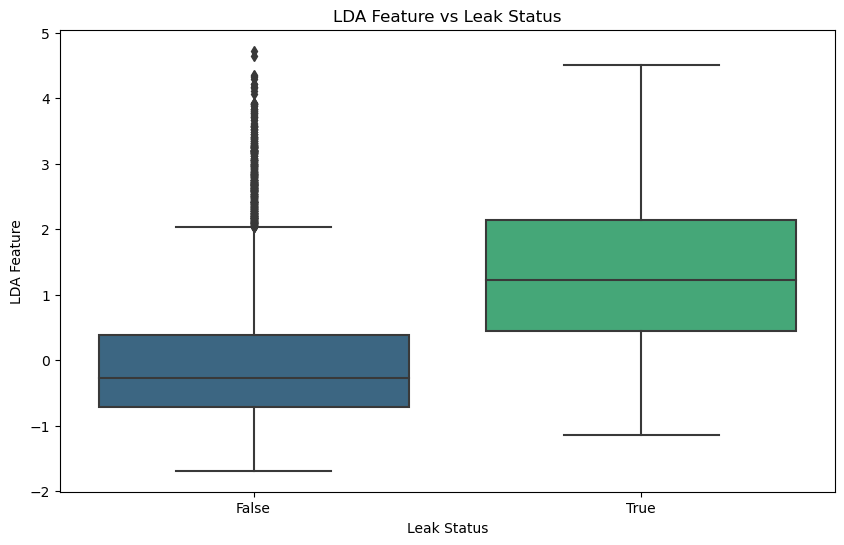

In [150]:
# lets do the feature selection with Line Discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=1)
X = df[numerical_features]
y = df['isleak']
lda.fit(X, y)
# Transform the features
X_lda = lda.transform(X)
# Create a DataFrame with the transformed features
lda_df = pd.DataFrame(data=X_lda, columns=['lda_feature'])
# Add the target variable to the DataFrame
lda_df['isleak'] = y.values
# Plot the LDA feature against the target variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='isleak', y='lda_feature', data=lda_df, palette='viridis')
plt.title('LDA Feature vs Leak Status')
plt.xlabel('Leak Status')
plt.ylabel('LDA Feature')
plt.show()


In [151]:
X_lda

array([[ 0.02642844],
       [-0.88320376],
       [-0.37021151],
       ...,
       [ 0.50541065],
       [-0.14830255],
       [-1.0558468 ]])

In [152]:
X = lda_df.drop(['isleak'], axis=1)
y = lda_df['isleak']

In [132]:
from imblearn.over_sampling import SMOTE

In [153]:
y.value_counts()

False    9886
True      114
Name: isleak, dtype: int64

In [154]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((8000, 1), (2000, 1))

In [156]:
# X_train = preprocessor.fit_transform(X_train)
# X_test = preprocessor.transform(X_test)

In [157]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)


In [158]:
X_train_bal

,lda_feature
0,-0.469969
1,-0.512606
2,0.537173
3,1.068284
4,-0.294111
...,...
15813,3.317028
15814,1.039462
15815,1.183440
15816,3.166003


In [138]:
# X_train = preprocessor.fit_transform(X_train)
# X_test = preprocessor.transform(X_test)

In [159]:
X_train_bal

,lda_feature
0,-0.469969
1,-0.512606
2,0.537173
3,1.068284
4,-0.294111
...,...
15813,3.317028
15814,1.039462
15815,1.183440
15816,3.166003


In [160]:
# import the Pipeline and the classifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = Pipeline([
    ('clf', RandomForestClassifier(class_weight='balanced', random_state=42))
])


model.fit(X_train_bal, y_train_bal)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

       False     0.9944    0.7183    0.8341      1977
        True     0.0262    0.6522    0.0504        23

    accuracy                         0.7175      2000
   macro avg     0.5103    0.6852    0.4422      2000
weighted avg     0.9833    0.7175    0.8251      2000



In [142]:
# import the Pipeline and the classifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
model = Pipeline([
    ('logisticR', LogisticRegression(max_iter=1000, random_state=42))
])


model.fit(X_train_bal, y_train_bal)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

       False     0.9961    0.7790    0.8743      1977
        True     0.0374    0.7391    0.0713        23

    accuracy                         0.7785      2000
   macro avg     0.5168    0.7590    0.4728      2000
weighted avg     0.9851    0.7785    0.8650      2000



In [44]:
# Get feature names after preprocessing
feature_names = (
    numerical_features + 
    list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)))
importances = model.named_steps['clf'].feature_importances_

# Display as sorted table
import pandas as pd
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(fi_df)


        Feature  Importance
0      duration    0.278575
3    total_flow    0.197819
2   variability    0.151939
1     flow_rate    0.093680
5        minute    0.076986
4          hour    0.070684
6       seconds    0.065440
13      day_Wed    0.011978
11      day_Thu    0.010368
8       day_Mon    0.010192
10      day_Sun    0.009321
7       day_Fri    0.008219
12      day_Tue    0.007776
9       day_Sat    0.007023


In [144]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
models = {
    "logistic_regresio" : LogisticRegression(),
    "Random Forest" : RandomForestClassifier(n_estimators= 100, min_samples_split= 15, max_features= 5, max_depth= 8),
    "Ada Boost" : AdaBoostClassifier(n_estimators= 50, algorithm ='SAMME.R'),
    "Gradient Boosting" : GradientBoostingClassifier(subsample= 0.8, n_estimators = 300, max_depth = 3, learning_rate=0.01),
    "XGBoost" : XGBClassifier(subsample = 0.8, n_estimators = 100, max_depth = 5, learning_rate = 0.2, colsample_bytree = 1.0)
}

In [4]:
#!pip install xgboost

In [145]:
from sklearn.metrics import recall_score, f1_score,roc_auc_score, accuracy_score

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train_bal, y_train_bal)

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Training set performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_f1 = f1_score(y_train, y_train_pred)
    model_train_auc_roc = roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])

    # Test set performance 
    model_test_accuracy = accuracy_score(y_test, y_test_pred)
    model_test_recall = recall_score(y_test, y_test_pred)
    model_test_f1 = f1_score(y_test, y_test_pred)
    model_test_auc_roc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    print(list(models.values())[i])
    print("-------------------------------")
    print("Model Performance for train set")
    print("model train accuracy", model_train_accuracy)
    print("Model recall on train set", model_train_recall)
    print("model f1 score on train set", model_train_f1)
    print("--------------------------")
    print("Model performance on Test set")
    print("model test set accuracy", model_test_accuracy)
    print("Test set recall", model_test_recall)
    print("Test set f1", model_test_f1)

LogisticRegression()
-------------------------------
Model Performance for train set
model train accuracy 0.78375
Model recall on train set 0.7032967032967034
model f1 score on train set 0.0688912809472551
--------------------------
Model performance on Test set
model test set accuracy 0.7785
Test set recall 0.7391304347826086
Test set f1 0.07127882599580714
RandomForestClassifier(max_depth=8, max_features=5, min_samples_split=15)
-------------------------------
Model Performance for train set
model train accuracy 0.8755
Model recall on train set 0.8901098901098901
model f1 score on train set 0.1398963730569948
--------------------------
Model performance on Test set
model test set accuracy 0.854
Test set recall 0.43478260869565216
Test set f1 0.06410256410256411
AdaBoostClassifier()
-------------------------------
Model Performance for train set
model train accuracy 0.914
Model recall on train set 0.4725274725274725
model f1 score on train set 0.11111111111111112
---------------------

In [32]:
rf_params = {
    'max_depth' : [5,8,15,None,10],
    'max_features' : [5,7,'auto', 8],
    'min_samples_split': [2,8,15,20],
    "n_estimators": [100,200,500,100]
}

adaboost_params = {
    "n_estimators": [50,60,70,80],
    "algorithm" :['SAME', 'SAMME.R'] 
}

gradientboost_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}
xgboost_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]  
}
   
randomcv_model = [
    ("RF", RandomForestClassifier(),rf_params),
    ("ADaboost", AdaBoostClassifier(), adaboost_params),
    ("Gradient Boosting", GradientBoostingClassifier(), gradientboost_params),
    ("XGBoost", XGBClassifier(use_label_encoder=False, eval_metric='logloss'), xgboost_params)
]

In [33]:
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.model_selection import GridSearchCV
model_param = {}
for name, model, params in randomcv_model:
    random = RandomizedSearchCV(estimator=model,
                                param_distributions=params,
                                n_iter=100,
                                cv=3,
                                verbose=2,
                                n_jobs=-1
                                )
    
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_


for model_name in model_param:
    print(f"-----Best Params for {model_name}")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or r

[CV] END max_depth=10, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.6s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=5, min_samples_split=15, n_estimators=100; total time=   0.7s
[CV] END max_depth=8, max_features=5, min_samples_split=15, n_estimators=100; total time=   0.7s
[CV] END max_depth=8, max_features=5, min_samples_split=15, n_estimators=100; total time=   0.8s
[CV] END max_depth=15, max_features=auto, min_samples_split=15, n_estimators=200; total time=   1.2s
[CV] END max_depth=15, max_features=auto, min_samples_split=15, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=15, max_features=auto, min_samples_split=15, n_estimators=200; total time=   1.1s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=8, max_features=5, min_samples_split=20, n_estimators=200; total time=   1.4s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=8, min_samples_split=20, n_estimators=100; total time=   0.8s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_split=15, n_estimators=200; total time=   1.1s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=5, min_samples_split=20, n_estimators=500; total time=   2.9s
[CV] END max_depth=5, max_features=5, min_samples_split=20, n_estimators=500; total time=   2.7s
[CV] END max_depth=5, max_features=5, min_samples_split=20, n_estimators=500; total time=   2.8s
[CV] END max_depth=10, max_features=auto, min_samples_split=15, n_estimators=200; total time=   1.0s
[CV] END max_depth=10, max_features=auto, min_samples_split=15, n_estimators=200; total time=   0.9s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=8, max_features=8, min_samples_split=20, n_estimators=500; total time=   4.7s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=200; total time=   1.1s
[CV] END max_depth=5, max_features=5, min_samples_split=2, n_estimators=200; total time=   1.2s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or r

[CV] END max_depth=8, max_features=8, min_samples_split=20, n_estimators=500; total time=   4.5s
[CV] END max_depth=8, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.4s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=8, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=8, max_features=8, min_samples_split=20, n_estimators=500; total time=   5.0s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=8, min_samples_split=15, n_estimators=200; total time=   1.8s
[CV] END max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=8, min_samples_split=15, n_estimators=200; total time=   2.0s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=7, min_samples_split=20, n_estimators=200; total time=   1.2s
[CV] END max_depth=5, max_features=7, min_samples_split=20, n_estimators=200; total time=   1.2s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=5, min_samples_split=8, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, max_features=8, min_samples_split=15, n_estimators=200; total time=   2.3s
[CV] END max_depth=5, max_features=7, min_samples_split=20, n_estimators=200; total time=   1.4s
[CV] END max_depth=None, max_features=auto, min_samples_split=20, n_estimators=200; total time=   1.0s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=5, min_samples_split=8, n_estimators=200; total time=   1.5s
[CV] END max_depth=10, max_features=5, min_samples_split=8, n_estimators=200; total time=   1.4s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=20, n_estimators=200; total time=   1.0s
[CV] END max_depth=15, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END max_depth=15, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=auto, min_samples_split=20, n_estimators=200; total time=   1.1s
[CV] END max_depth=15, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.7s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_split=20, n_estimators=200; total time=   1.0s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_split=20, n_estimators=200; total time=   1.1s
[CV] END max_depth=10, max_features=auto, min_samples_split=20, n_estimators=200; total time=   1.1s
[CV] END max_depth=10, max_features=7, min_samples_split=8, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=7, min_samples_split=8, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, max_features=7, min_samples_split=8, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, max_features=8, min_samples_split=20, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, max_features=8, min_samples_split=20, n_estimators=100; total time=   1.1s
[CV] END max_depth=10, max_features=8, min_samples_split=20, n_estimators=100; total time=   0.9s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or r

[CV] END max_depth=None, max_features=8, min_samples_split=20, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, max_features=8, min_samples_split=20, n_estimators=100; total time=   1.2s
[CV] END max_depth=15, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.6s
[CV] END max_depth=15, max_features=auto, min_samples_split=8, n_estimators=500; total time=   2.5s
[CV] END max_depth=15, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=8, min_samples_split=20, n_estimators=100; total time=   1.0s
[CV] END max_depth=15, max_features=auto, min_samples_split=8, n_estimators=500; total time=   2.7s
[CV] END max_depth=15, max_features=auto, min_samples_split=8, n_estimators=500; total time=   2.5s
[CV] END max_depth=None, max_features=5, min_samples_split=8, n_estimators=100; total time=   0.7s
[CV] 

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=8, min_samples_split=20, n_estimators=500; total time=   4.6s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=8, min_samples_split=20, n_estimators=500; total time=   4.9s
[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=500; total time=   2.4s
[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=500; total time=   2.4s
[CV] END max_depth=15, max_features=8, min_samples_split=20, n_estimators=500; total time=   5.5s
[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=500; total time=   4.2s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=200; total time=   1.0s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=500; total time=   5.0s
[CV] END max_depth=8, max_features=auto, min_samples_split=8, n_estimators=500; total time=   2.6s
[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=500; total time=   4.5s
[CV] END max_depth=8, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=8, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=8, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.7s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=200; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.5s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END max_depth=5, max_features=8, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=500; total time=   4.4s
[CV] END max_depth=5, max_features=8, min_samples_split=2, n_estimators=100; total time=   0.8s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=8, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=500; total time=   4.7s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=500; total time=   4.8s
[CV] END max_depth=5, max_features=auto, min_samples_split=20, n_estimators=500; total time=   2.1s
[CV] END max_depth=5, max_features=auto, min_samples_split=20, n_estimators=500; total time=   2.1s
[CV] END max_depth=5, max_features=auto, min_samples_split=20, n_estimators=500; total time=   2.2s
[CV] END max_depth=10, max_features=8, min_samples_split=8, n_estimators=500; total time=   4.9s
[CV] END max_depth=10, max_features=8, min_samples_split=8, n_estimators=500; total time=   5.2s
[CV] END max_depth=10, max_features=8, min_samples_split=8, n_estimators=500; total time=   5.2s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=500; total time=   3.5s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=500; total time=   3.7s
[CV] END max_depth=10, max_features=5, min_samples_split=2, n_estimators=500; total time=   3.5s
[CV] END max_depth=15, max_features=auto, min_samples_split=15, n_estimators=500; total time=   2.5s
[CV] END max_depth=15, max_features=auto, min_samples_split=15, n_estimators=500; total time=   2.6s
[CV] END max_depth=None, max_features=8, min_samples_split=20, n_estimators=200; total time=   1.8s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_split=15, n_estimators=500; total time=   2.6s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=8, min_samples_split=2, n_estimators=500; total time=   4.8s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.5s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=8, min_samples_split=20, n_estimators=200; total time=   2.1s
[CV] END max_depth=None, max_features=8, min_samples_split=20, n_estimators=200; total time=   2.0s
[CV] END max_depth=10, max_features=8, min_samples_split=2, n_estimators=500; total time=   5.2s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=10, max_features=8, min_samples_split=2, n_estimators=500; total time=   5.2s
[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=auto, min_samples_split=8, n_estimators=100; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_split=20, n_estimators=500; total time=   2.4s
[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=100; total time=   0.8s
[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=100; total time=   0.9s
[CV] END max_depth=15, max_features=auto, min_samples_split=20, n_estimators=500; total time=   2.6s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or r

[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=100; total time=   0.9s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END max_depth=15, max_features=auto, min_samples_split=20, n_estimators=500; total time=   2.8s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.4s
[CV] END max_depth=8, max_features=8, min_samples_split=20, n_estimators=200; total time=   1.8s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.5s
[CV] END max_depth=8, max_features=8, min_samples_split=20, n_estimators=200; total time=   2.0s
[CV] END max_depth=8, max_features=8, min_samples_split=20, n_estimators=200; total time=   2.1s
[CV] END max_depth=5, max_features=7, min_samples_split=8, n_estimators=200; total time=   1.5s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=500; total time=   2.7s
[CV] END max_depth=5, max_features=7, min_samples_split=8, n_estimators=200; total time=   1.6s
[CV] END max_depth=5, max_features=7, min_samples_split=8, n_estimators=200; total time=   1.5s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=500; total time=   2.8s
[CV] END max_dept

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=7, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=5, max_features=7, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=5, max_features=7, min_samples_split=2, n_estimators=200; total time=   1.5s
[CV] END max_depth=5, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=5, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=100; total time=   1.2s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=7, min_samples_split=15, n_estimators=200; total time=   1.9s
[CV] END max_depth=5, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.5s
[CV] END max_depth=None, max_features=7, min_samples_split=2, n_estimators=100; total time=   1.2s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=100; total time=   1.0s
[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=100; total time=   1.0s
[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=100; total time=   1.1s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or r

[CV] END max_depth=10, max_features=auto, min_samples_split=20, n_estimators=500; total time=   2.7s
[CV] END max_depth=10, max_features=auto, min_samples_split=20, n_estimators=500; total time=   2.7s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=15, n_estimators=500; total time=   2.5s
[CV] END max_depth=10, max_features=auto, min_samples_split=20, n_estimators=500; total time=   2.6s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=auto, min_samples_split=15, n_estimators=500; total time=   2.7s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=200; total time=   0.9s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=200; total time=   0.7s
[CV] END max_depth=None, max_features=7, min_samples_split=20, n_estimators=500; total time=   4.5s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=200; total time=   1.1s
[CV] END max_depth=None, max_features=7, min_samples_split=20, n_estimators=500; total time=   4.8s
[CV] END max_depth=5, max_features=7, min_samples_split=20, n_estimators=100; total time=   0.8s
[CV] END max_depth=5, max_features=7, min_samples_split=20, n_estimators=100; total time=   0.7s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=7, min_samples_split=20, n_estimators=500; total time=   5.5s
[CV] END max_depth=8, max_features=auto, min_samples_split=15, n_estimators=500; total time=   2.6s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.5s
[CV] END max_depth=10, max_features=8, min_samples_split=8, n_estimators=200; total time=   2.2s
[CV] END max_depth=5, max_features=7, min_samples_split=20, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_split=20, n_estimators=100; total time=   0.6s
[CV] END max_depth=10, max_features=8, min_samples_split=8, n_estimators=200; total time=   2.3s
[CV] END max_depth=8, max_features=7, min_samples_split=2, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, max_features=8, min_samples_split=8, n_estimators=200; total time=   2.3s
[CV] END max_depth=5, max_features=8, min_samples_split=15, n_estimators=100; total time=   0.8s
[CV] END max_depth=8, max_features=7, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END max_d

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or r

[CV] END max_depth=15, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=15, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.6s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=8, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=15, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.6s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=8, min_samples_split=2, n_estimators=200; total time=   1.6s
[CV] END max_depth=5, max_features=8, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END max_depth=5, max_features=auto, min_samples_split=20, n_estimators=200; total time=   0.9s
[CV] END max_depth=5, max_features=auto, min_samples_split=20, n_estimators=200; total time=   0.9s
[CV] END max_depth=5, max_features=auto, min_samples_split=20, n_estimators=200; total time=   0.9s
[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=500; total time=   2.8s
[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=500; total time=   2.8s
[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=500; total time=   2.9s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.4s
[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.5s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=auto, min_samples_split=15, n_estimators=100; total time=   0.4s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=200; total time=   1.9s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=200; total time=   2.3s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=15, max_features=7, min_samples_split=20, n_estimators=200; total time=   2.0s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=5, max_features=5, min_samples_split=20, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=200; total time=   1.2s
[CV] END max_depth=5, max_features=5, min_samples_split=20, n_estimators=100; total time=   0.5s
[CV] END max_depth=5, max_features=5, min_samples_split=20, n_estimators=100; total time=   0.6s
[CV] END max_depth=None, max_features=8, min_samples_split=15, n_estimators=500; total time=   5.3s
[CV] END max_depth=8, max_features=8, min_samples_split=8, n_estimators=200; total time=   2.0s
[CV] END ma

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=7, min_samples_split=8, n_estimators=100; total time=   1.1s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.6s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=15, max_features=5, min_samples_split=20, n_estimators=200; total time=   1.5s
[CV] END max_depth=15, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.6s
[CV] END max_depth=15, max_features=5, min_samples_split=20, n_estimators=200; total time=   1.7s
[CV] END max_depth=15, max_features=5, min_samples_split=20, n_estimators=200; total time=   1.6s
[CV] END max_depth=15, max_features=8, min_samples_split=15, n_estimators=500; total time=   5.3s
[CV] END max_depth=8, max_features=7, min_samples_split=20, n_estimators=100; total time=   0.9s
[CV] END max_depth=8, max_features=7, min_samples_split=20, n_estimators=100; total time=   1.0s
[CV] END max_depth=8, max_features=7, min_samples_split=20, n_estimators=100; total time=   0.9s
[CV] END max_depth=8, max_features=5, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=15

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=8, max_features=8, min_samples_split=20, n_estimators=100; total time=   1.1s
[CV] END max_depth=15, max_features=auto, min_samples_split=8, n_estimators=200; total time=   1.1s
[CV] END max_depth=15, max_features=auto, min_samples_split=8, n_estimators=200; total time=   1.2s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_split=8, n_estimators=200; total time=   1.0s
[CV] END max_depth=8, max_features=7, min_samples_split=15, n_estimators=500; total time=   4.5s
[CV] END max_depth=None, max_features=5, min_samples_split=20, n_estimators=500; total time=   3.7s
[CV] END max_depth=None, max_features=5, min_samples_split=20, n_estimators=500; total time=   4.0s
[CV] END max_depth=8, max_features=7, min_samples_split=15, n_estimators=500; total time=   4.6s
[CV] END max_depth=None, max_features=5, min_samples_split=20, n_estimators=500; total time=   3.7s
[CV] END max_depth=8, max_features=7, min_samples_split=15, n_estimators=500; total time=   5.0s
[CV] END max_depth=5, max_features=5, min_samples_split=8, n_estimators=200; total time=   1.2s
[CV] END max_depth=5, max_features=5, min_samples_split=8, n_estimators=200; total time=   1.2s
[CV] END max_depth=5, max_features=5, min_samples_split=8, n_estimators=200; total time=   1.2s
[CV] END max_depth=5,

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=5, max_features=8, min_samples_split=20, n_estimators=500; total time=   4.7s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.6s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=None, max_features=auto, min_samples_split=2, n_estimators=100; total time=   0.7s
[CV] END max_depth=10, max_features=8, min_samples_split=20, n_estimators=100; total time=   0.9s
[CV] END max_depth=10, max_features=8, min_samples_split=20, n_estimators=100; total time=   1.2s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=5, min_samples_split=8, n_estimators=500; total time=   3.9s
[CV] END max_depth=15, max_features=5, min_samples_split=8, n_estimators=500; total time=   4.1s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END max_depth=15, max_features=5, min_samples_split=8, n_estimators=500; total time=   4.3s
[CV] END max_depth=10, max_features=8, min_samples_split=20, n_estimators=100; total time=   1.2s
[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=200; total time=   1.2s
[CV] END max_depth=None, max_features=5, min_samples_split=20, n_estimators=100; total time=   0.8s
[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=200; total time=   1.2s
[CV] END max_depth=None, max_features=5, min_samples_split=20, n_estimators=100; total time=   1.0s
[CV] END max_depth=10, max_features=auto, min_samples_split=8, n_estimators=200; total time=   1.4s
[CV] END max_depth=None, max_features=5, min_samples_split=20, n_estimators=100; total time=   1.0s
[CV] END max_depth=None, max_features=8, min_samples_split=2, n_estimators=500; total time=   5.6s
[CV] END max_depth=None, max_features=8, min_samples_split=2, n_estimators=500; total time=   5.9s
[CV] EN

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 8 is smaller than n_iter=100. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ....................algorithm=SAME, n_estimators=50; total time=   0.0s
[CV] END ....................algorithm=SAME, n_estimators=50; total time=   0.0s
[CV] END ....................algorithm=SAME, n_estimators=50; total time=   0.0s
[CV] END ....................algorithm=SAME, n_estimators=60; total time=   0.0s
[CV] END ....................algorithm=SAME, n_estimators=60; total time=   0.0s
[CV] END ....................algorithm=SAME, n_estimators=60; total time=   0.0s
[CV] END ....................algorithm=SAME, n_estimators=70; total time=   0.0s
[CV] END ....................algorithm=SAME, n_estimators=70; total time=   0.0s
[CV] END ....................algorithm=SAME, n_estimators=70; total time=   0.0s
[CV] END ....................algorithm=SAME, n_estimators=80; total time=   0.0s
[CV] END ....................algorithm=SAME, n_estimators=80; total time=   0.0s
[CV] END ....................algorithm=SAME, n_es

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
12 fits failed out of a total of 24.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
11 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py", line 124, in fit
    self._validate_params()
  File "/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/sklearn/base.py", line 581, in _validate_params


Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.4s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.3s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   2.2s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   2.6

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimato

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.4s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=20

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=10

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=30

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.2s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=1

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=2

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=20

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=20

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=3, n_estimators=200

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=5, n_estimators=300

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=10

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=1.0, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.2s


/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.2s[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.2s

[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=1.0, learning_rate=0.2, max_depth=7, n_estimators

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters:

[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.2s
-----Best Params for RF
{'n_estimators': 100, 'min_samples_split': 15, 'max_f

/Users/balmukundmishra/anaconda3/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [13:54:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [39]:
df['abnoramal_leak'] = df['variability']/df['flow_rate']
df1['abnoramal_leak'] = df1['variability']/df1['flow_rate']

In [40]:
df.head()

,Unnamed: 0,time,day,duration,flow_rate,variability,isleak,total_leak,abnoramal_leak
0,0,0:31:37,Sun,10,2.005437,0.445410,False,20.054368,0.222101
1,1,19:20:08,Sat,141,2.244325,0.097051,False,316.449891,0.043243
2,2,19:24:42,Thu,22,1.447766,0.328988,False,31.850842,0.227238
3,3,15:20:20,Sat,45,1.796816,0.670781,False,80.856712,0.373316
4,4,21:47:19,Mon,37,0.372023,0.347357,False,13.764847,0.933698


/var/folders/46/qv_lmdyx6j7b2zym7spyl3lm0000gn/T/ipykernel_10198/2297655038.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isleak', y='total_leak', data=df, palette='viridis')


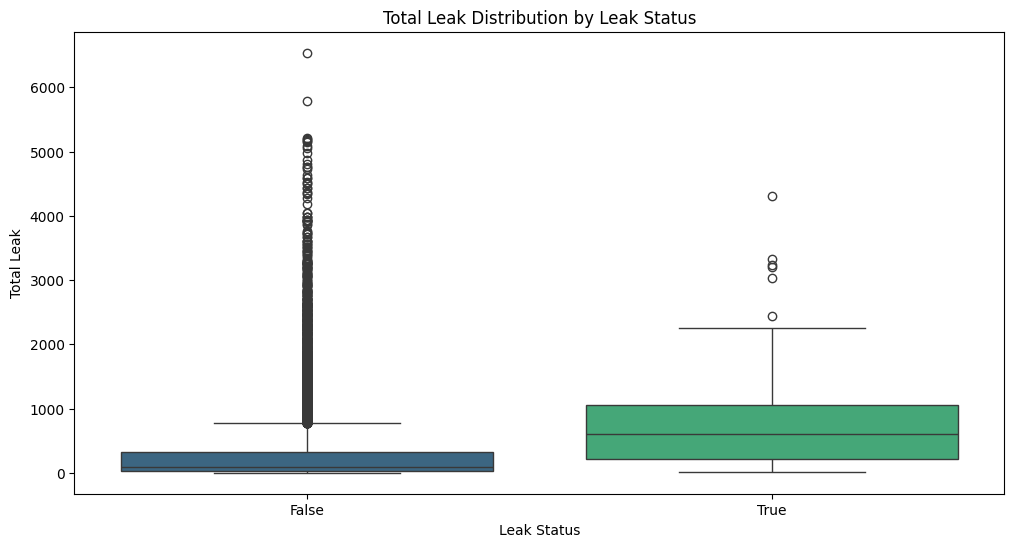

In [37]:
# lets plot the isleak status with the collumn total_leak
import seaborn as sns
import matplotlib.pyplot as plt
## lets check the relevence of flow_rate on leak status
plt.figure(figsize=(12, 6))
sns.boxplot(x='isleak', y='total_leak', data=df, palette='viridis')
plt.title('Total Leak Distribution by Leak Status')
plt.xlabel('Leak Status')
plt.ylabel('Total Leak')
plt.show()


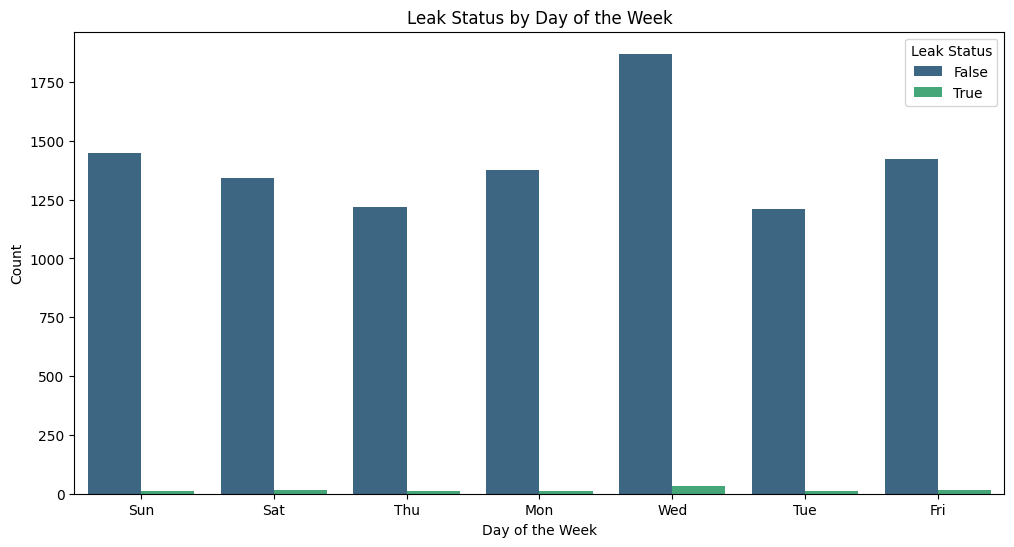

In [11]:
## lets plot the leaks status for each day of the week
plt.figure(figsize=(12, 6))
sns.countplot(x='day', hue='isleak', data=df, palette='viridis')
plt.title('Leak Status by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.legend(title='Leak Status', loc='upper right')
plt.show()


In [30]:
## lets plot the leaks status for each day of the week
plt.figure(figsize=(12, 6))
sns.boxplot(x='day', y='leakage', hue='isleak', data=df, palette='viridis')
plt.title('Leakage Amount by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Leakage Amount')
plt.legend(title='Leak Status', loc='upper right')
plt.show()


ValueError: Could not interpret value `leakage` for `y`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>

/var/folders/46/qv_lmdyx6j7b2zym7spyl3lm0000gn/T/ipykernel_10198/952242229.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='isleak', y='flow_rate', data=df, palette='viridis')


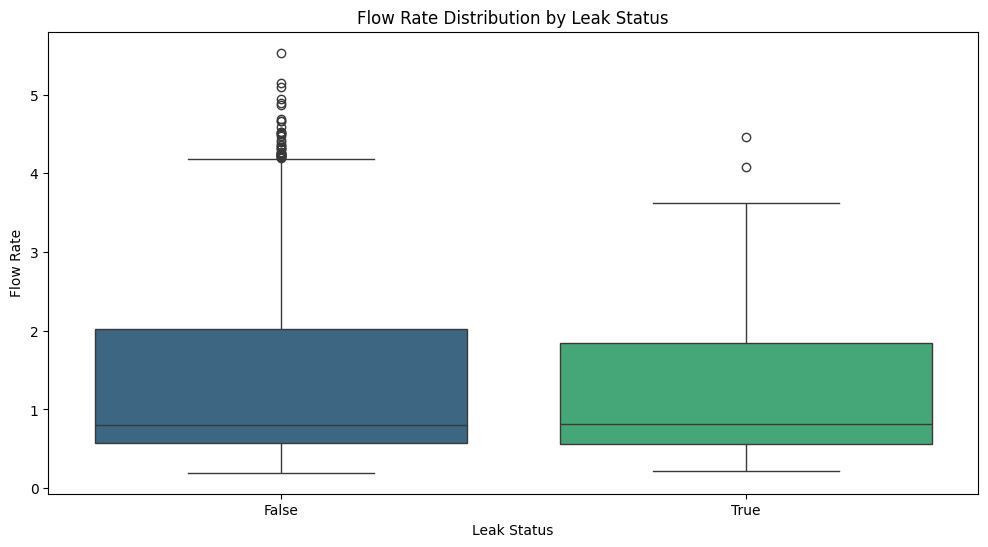

In [17]:
## lets check the relevence of flow_rate on leak status
plt.figure(figsize=(12, 6))
sns.boxplot(x='isleak', y='flow_rate', data=df, palette='viridis')
plt.title('Flow Rate Distribution by Leak Status')
plt.xlabel('Leak Status')
plt.ylabel('Flow Rate')
plt.show()

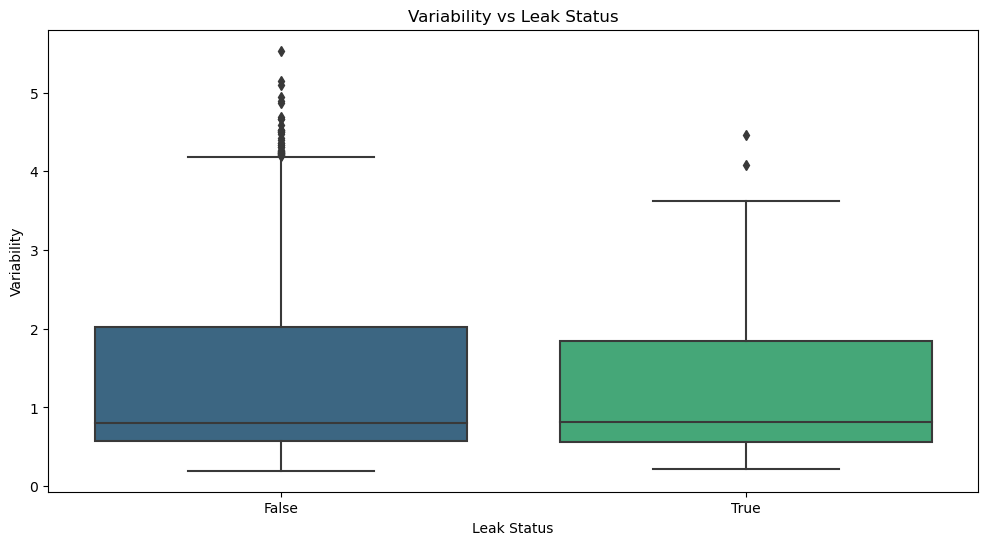

In [268]:
## lets plot the relevence of variability collumn on leak status
plt.figure(figsize=(12, 6))
sns.boxplot(x='isleak',y='flow_rate', data=df, palette='viridis')
plt.title('Variability vs Leak Status')
plt.xlabel('Leak Status')
plt.ylabel('Variability')
plt.show()

/var/folders/46/qv_lmdyx6j7b2zym7spyl3lm0000gn/T/ipykernel_70131/2442915857.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=df['variability'], kde=True, color='blue')


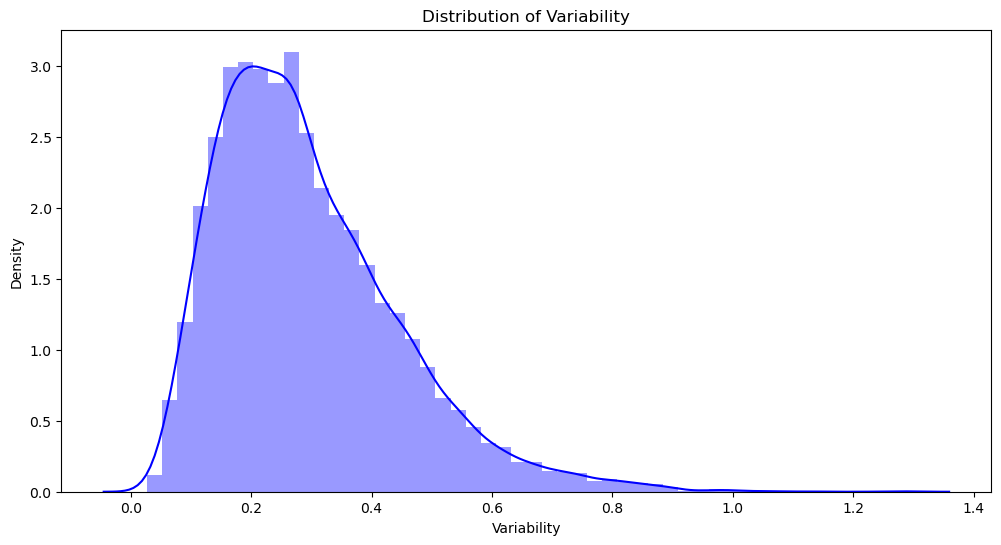

In [269]:
## lets plot the relevence of variability collumn on leak status
plt.figure(figsize=(12, 6))
sns.distplot(x=df['variability'], kde=True, color='blue')
plt.title('Distribution of Variability')
plt.xlabel('Variability')
plt.ylabel('Density')
plt.show()

/var/folders/46/qv_lmdyx6j7b2zym7spyl3lm0000gn/T/ipykernel_10198/1991189294.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='isleak', data=df1, palette='viridis')


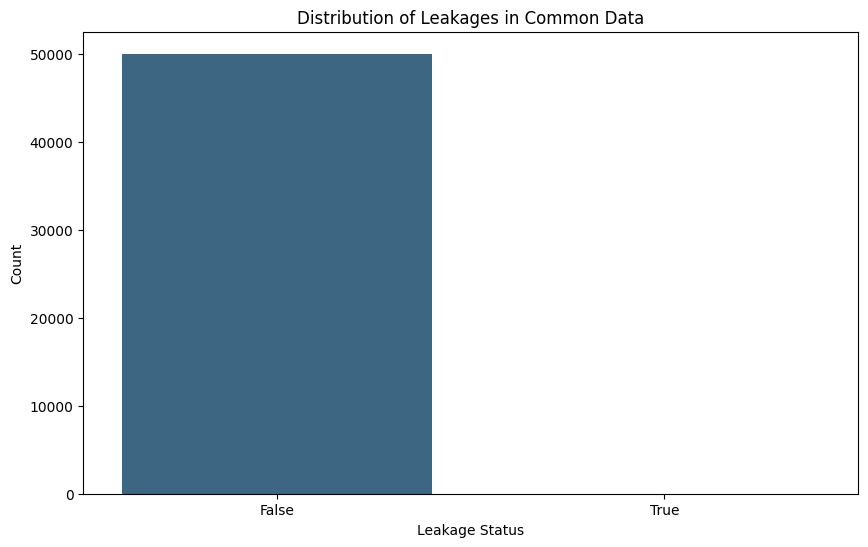

In [10]:
## lets plot the data
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(x='isleak', data=df1, palette='viridis')
plt.title('Distribution of Leakages in Common Data')
plt.xlabel('Leakage Status')
plt.ylabel('Count')
plt.show()


In [5]:
df.isnull().sum()

Unnamed: 0     0
time           0
day            0
duration       0
flow_rate      0
variability    0
isleak         0
dtype: int64

In [ ]:
## lets process the timestamp
